# Introduction

The objective of this project is to develop a predictive model that determines the likelihood of a passenger’s survival aboard the RMS Titanic which involves applying data preprocessing techniques and logistic regression to analyze patterns and influential factors that contributed to survival outcomes. The analysis demonstrates how statistical and machine learning models can be used to extract insights and make informed predictions based on historical data.

The dataset used for this analysis is a Titanic dataset from Kaggle, which contains information on 891 passengers. Key features include demographic details such as age and sex, socio-economic indicators like passenger class and fare, and travel-specific attributes such as the number of siblings/spouses aboard (SibSp), the number of parents/children aboard (Parch), and port of embarkation (Embarked). The target variable is 'Survived', which indicates whether a passenger survived (1) or did not survive (0) the disaster.

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

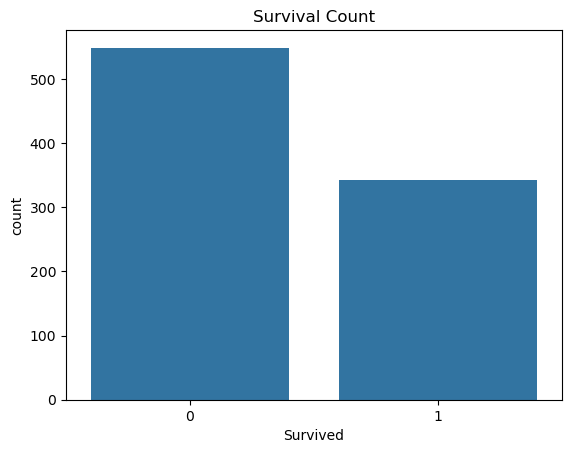

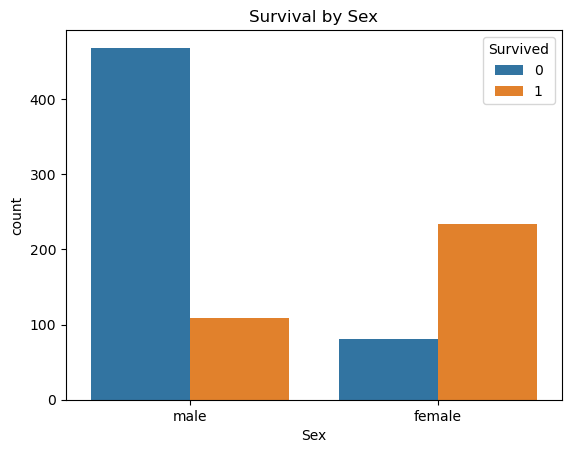

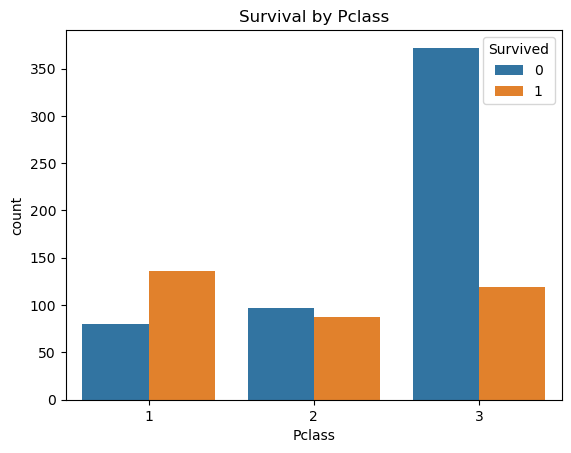

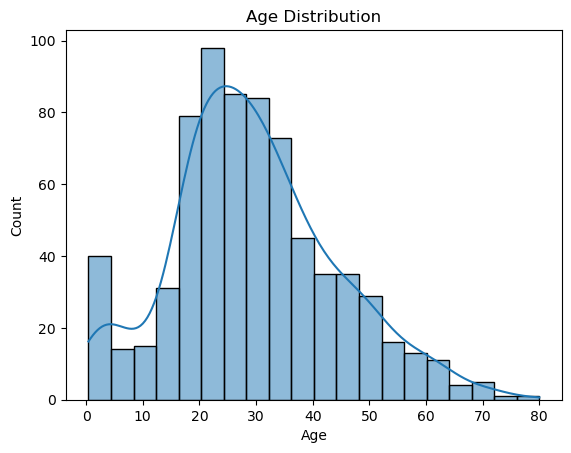

Missing Values per Column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


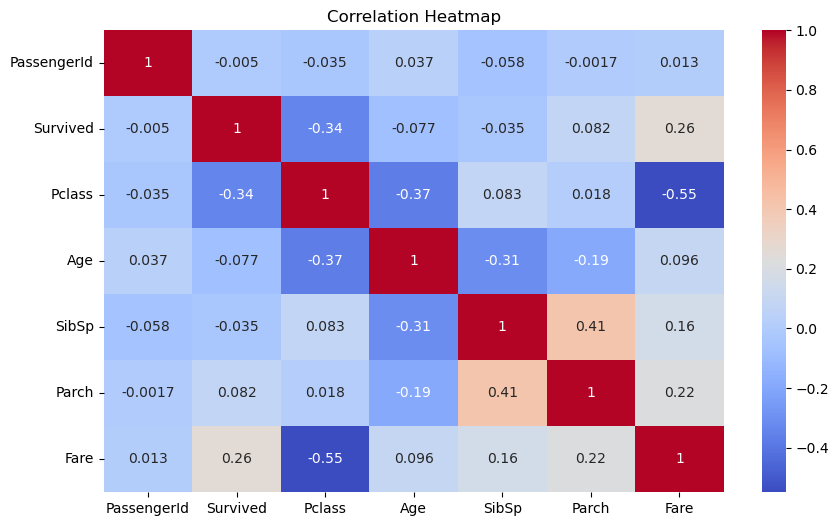

In [12]:
# Data Preprocessing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc)

## Load the dataset
df = pd.read_csv('train.csv')
print(df.head())
print(df.info())
print(df.isnull().sum())

## Exploratory data analysis
### Survivors vs non-survivors
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

### Survival rate by Sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()

### Survival rate by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Pclass')
plt.show()

### Age distribution
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

## Check for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:\n", missing_values)

## Correlation heatmap
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])  # filter numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True)  # Too many missing values

## Convert categorical variables to numerical
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # male=1, female=0
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

## Normalize
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

## Split into training and testing sets
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Model Implementation
## Logistic Regression

model = LogisticRegression(max_iter=1000)

## Train model

model.fit(X_train, y_train)

## Predict outcomes

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888


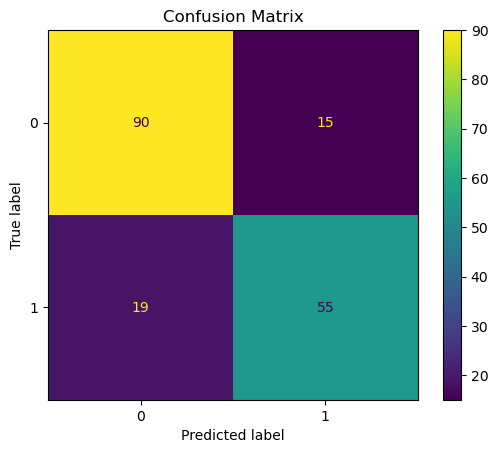

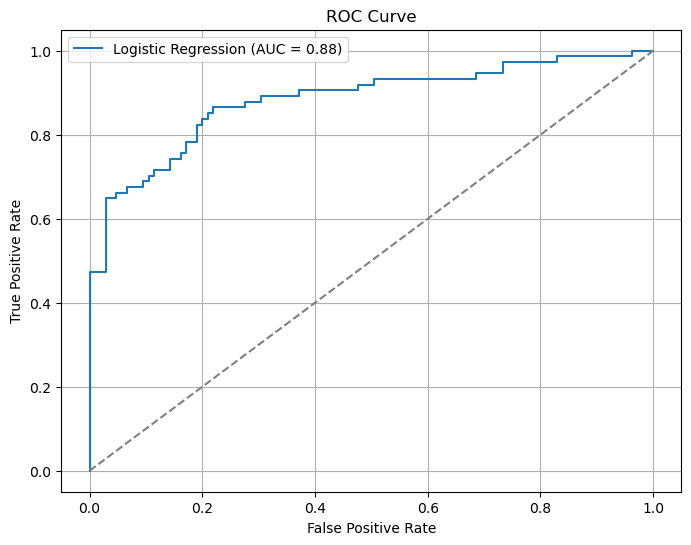

ROC AUC Score: 0.8828828828828829


In [17]:
# Model Evaluation
## Calculate and interpret performance metrics and Visualize results
### Accuracy, Precision, Recall, F1-Score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

### Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

### ROC Curve and AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.2f})'.format(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

# Results Interpretation and Discussion

After conducting necessary data preprocessing steps, the model was trained and evaluated. The resulting performance metrics 
showed that the model achieved an accuracy of 80%, a precision of 77%, a recall of 71%, an F1-score of 74%, and an AUC-ROC 
score of 85%. These results indicate that the model performs well in distinguishing between passengers who survived and those 
who did not, with the AUC score reflecting a particularly strong ability to discriminate between the two classes.

One of the key advantages of using logistic regression is its interpretability. The model's coefficients revealed that the 
passenger's sex was the most influential feature in predicting survival, with female passengers having a significantly higher 
likelihood of surviving than males. This aligns with historical records and the "women and children first" policy followed 
during the Titanic evacuation. Passenger class (Pclass) also emerged as a critical predictor, where first-class passengers were 
more likely to survive compared to those in lower classes. Other features such as fare and age also contributed to the 
prediction, with higher fare values slightly increasing survival chances and younger passengers generally having better 
outcomes. The embarkation point had a smaller effect on the model’s predictions but was still retained for its supportive 
contribution.

The real-world implications of this analysis, while centered on a historical event, are broadly applicable to other domains 
that require binary classification. Logistic regression is frequently used in fields such as healthcare, finance, and 
transportation. This project highlights how data-driven models can reveal underlying patterns in human behavior and 
decision-making during emergencies, as well as the importance of interpretable features in shaping fair and reliable 
predictions.

Despite the model's strong baseline performance, there are several avenues for improvement. One recommendation is to conduct 
further feature engineering, such as deriving a "family size" variable from the existing "SibSp" and "Parch" features or 
extracting honorifics like "Mr." or "Mrs." from the name column. These new features could provide additional predictive power. 
Additionally, comparing the logistic regression model to more complex algorithms may uncover non-linear relationships that 
improve predictive accuracy. Hyperparameter tuning, particularly the regularization parameter in logistic regression, could 
also lead to incremental gains. Although class imbalance was not severe in this dataset, techniques like adjusting class 
weights or using stratified sampling may further improve model fairness. Lastly, implementing k-fold cross-validation would 
provide a more robust estimate of the model’s generalization performance and help prevent overfitting to the training data.
